In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
blue = ['#cddfff',"#accbff","#92bbff","#78aaff","#649eff","#4188ff"]
yellow = ['#FEFEBE','#FDFD96','#FDFD66','#FEF24E',"#fffb05"]

In [ ]:
book_data = pd.read_csv("books 3.csv", error_bad_lines=False)
book_data

In [ ]:
book_data.describe()

#1. Average_ratings vs ratings_count

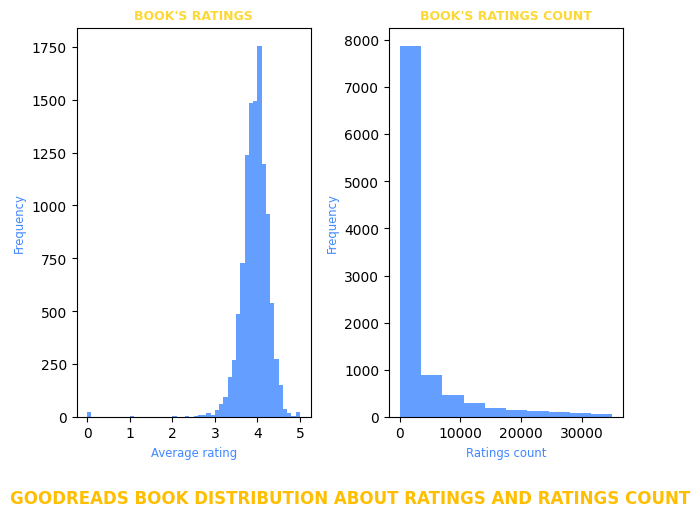

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)

#Book's avg rating distribution
ax1.hist(book_data.average_rating,bins=50, range = (0,5), color = "#649eff")

#Set title, label
ax1.set_title("BOOK'S RATINGS", color = '#fdd835', fontsize = "9", fontweight = "bold")
ax1.set_xlabel("Average rating", color = "#4188ff", fontsize = "small", fontweight = "book")
ax1.set_xticks (ticks = [0,1,2,3,4,5])
ax1.set_ylabel("Frequency", color = "#4188ff", fontsize = "small", fontweight = "book")

#Book's ratings count distribution
ax2.hist(book_data.ratings_count, bins=10, range = (0,35000), color = "#649eff")

#Set title, label
ax2.set_title("BOOK'S RATINGS COUNT", color = '#fdd835', fontsize = "9", fontweight = "bold")
ax2.set_xlabel("Ratings count", color = "#4188ff", fontsize = "small", fontweight = "book")
ax2.set_ylabel("Frequency", color = "#4188ff", fontsize = "small", fontweight = "book")

fig.tight_layout()
fig.suptitle("GOODREADS BOOK DISTRIBUTION ABOUT RATINGS AND RATINGS COUNT", x = 0.55, y = -0.06, va = 'baseline', color = '#ffbf00', fontweight = "semibold")
plt.savefig('/content/Graph/plot1.png', dpi=300)

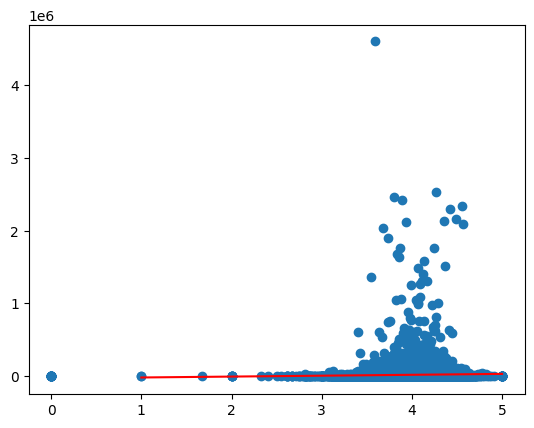

In [ ]:
x_axis = book_data.average_rating.values
y_axis = book_data.ratings_count.values

import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x_axis[:, np.newaxis], y_axis)

xfit = np.linspace(1, 5, 1000)
yfit = model.predict(xfit[:, np.newaxis])

z = np.polyfit(x_axis, y_axis, 1)
angular_coeff = z[0]
plt.scatter(x_axis, y_axis)
plt.plot(xfit, yfit, color = 'r');

#2.Authors

In [ ]:
author_df = pd.DataFrame(book_data.authors.value_counts()) #Create new df with value counts on authors column

In [ ]:
author_avg_dict = {}
author_count_dict = {}
index = 0

#create new dictionary of sum(average rating), sum(ratings count) for each author
for author in book_data['authors']:
  if author not in author_avg_dict:
    author_avg_dict[author] = book_data.average_rating[index]
  else:
    author_avg_dict[author] += book_data.average_rating[index]

  if author not in author_count_dict:
    author_count_dict[author] = book_data.ratings_count[index]
  else:
    author_count_dict[author] += book_data.ratings_count[index]

  index+=1

#Count average rating for each author
for author1 in author_avg_dict.keys():
  for author2 in author_df.index:
    if author1 == author2:
      author_avg_dict[author1] /= author_df.authors[author2]


In [ ]:
#Filter data by comparing with distribution's mean
author_df = pd.DataFrame(data = {"Author":author_avg_dict.keys(),"Ratings":author_avg_dict.values(),"Count":author_count_dict.values()})
top_author_df = author_df[(author_df['Ratings'] > (book_data['average_rating'].mean())) & (author_df['Count'] > (book_data['ratings_count'].mean()))]

#Sort data in ascending order
sorted_df = top_author_df.sort_values(["Count", "Ratings"], ascending=False)

In [ ]:
sorted_10_df = sorted_df.nlargest(10,'Ratings') #Find top 10 authors

,Author,Ratings,Count
3994,Bill Watterson,4.708571,144799
190,Hiromu Arakawa/Akira Watanabe,4.565833,229591
0,J.K. Rowling/Mary GrandPré,4.548333,8923980
4048,Neil Gaiman/Matt Wagner/George Pratt/Dick Gior...,4.540000,50951
8,Chris Smith/Christopher Lee/Richard Taylor,4.530000,19822
4051,Neil Gaiman/Michael Zulli/Jon J. Muth/Charles ...,4.520000,37038
1,J.K. Rowling,4.513636,75044
1838,Arthur Conan Doyle/Kyle Freeman,4.480000,27668
4050,Neil Gaiman/Mike Allred/Gary Amaro/Mark Buckin...,4.470000,36629
3667,Warren Ellis/Darick Robertson/Rodney Ramos,4.457500,43962


In [ ]:
#Replace "Many authors"
sorted_10_df.replace(to_replace = sorted_10_df['Author'][4048], value = "Many authors", inplace = True)
sorted_10_df.replace(to_replace = sorted_10_df['Author'][4050], value = "Many authors", inplace = True)

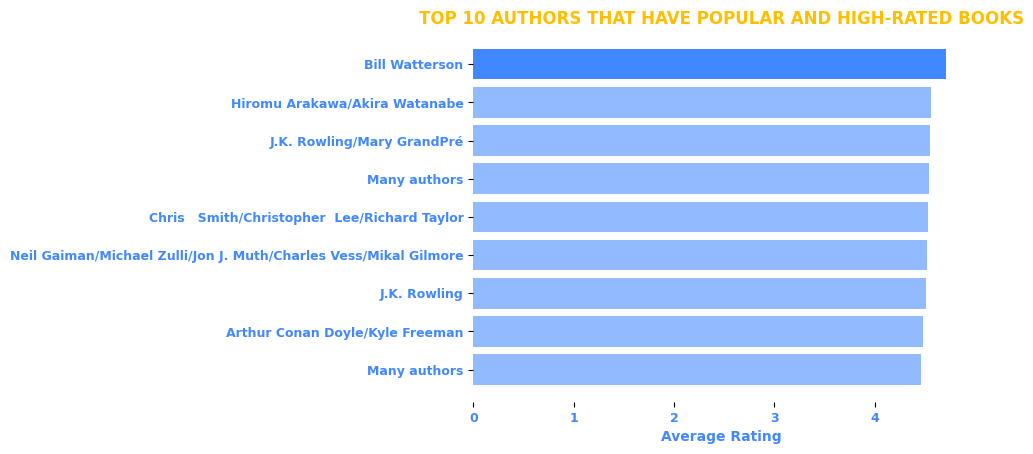

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

#Delete spines
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#Create bar char
ax.barh(sorted_10_df.Author, sorted_10_df.Ratings, align='center', color = ["#4188ff","#92bbff","#92bbff","#92bbff","#92bbff","#92bbff","#92bbff","#92bbff","#92bbff","#92bbff"])

#Set title, label
ax.set_title("TOP 10 AUTHORS THAT HAVE POPULAR AND HIGH-RATED BOOKS", color = '#ffbf00', fontsize = "large", fontweight = "bold")
ax.invert_yaxis()
ax.set_xlabel("Average Rating", color = "#4188ff", fontsize = "medium", fontweight = "bold")
ax.set_xticklabels(labels = [0,1,2,3,4,5], color = "#4188ff", fontsize = 9, fontweight = "bold")
ax.set_yticklabels(labels = sorted_10_df.Author , color = "#4188ff", fontsize = 9, fontweight = "bold")

plt.show()
plt.savefig('/content/Graph/plot2.png', dpi=300)

#3.Book

In [ ]:
#Filter data
top_book_df = book_data[(book_data['average_rating'] > (book_data['average_rating'].mean())) & (book_data['ratings_count'] > (book_data['ratings_count'].mean()))]

In [ ]:
#Sort data to by top 10
sorted_book_df = top_book_df.sort_values(["ratings_count", "average_rating"], ascending=False)
sorted_book_df = sorted_book_df.head(10)

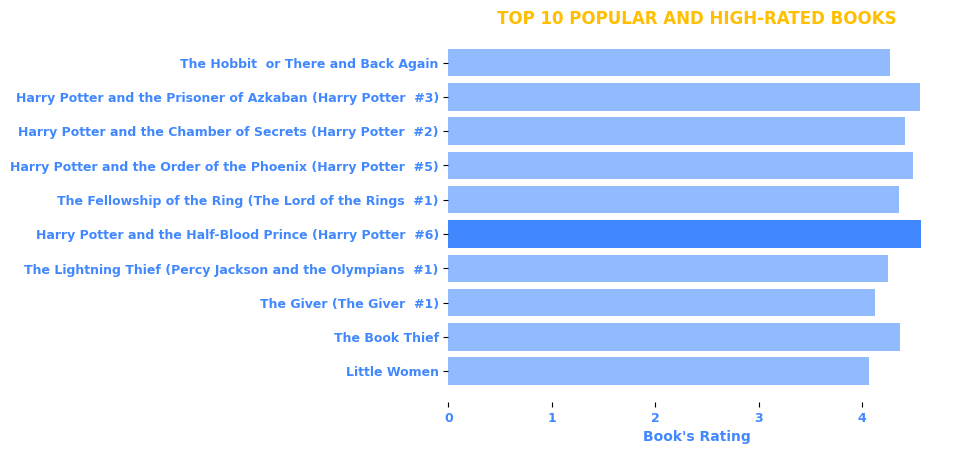

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
#Delete spines
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#Create a bar chart
ax.barh(sorted_book_df.title, sorted_book_df.average_rating, align='center', color = ["#92bbff","#92bbff","#92bbff","#92bbff","#92bbff","#4188ff","#92bbff","#92bbff","#92bbff","#92bbff"])

#Set title, label
ax.set_title("TOP 10 POPULAR AND HIGH-RATED BOOKS", color = '#ffbf00', fontsize = "large", fontweight = "bold")
ax.invert_yaxis()
ax.set_xlabel("Book's Rating", color = "#4188ff", fontsize = "medium", fontweight = "bold")
ax.set_xticklabels(labels = [0,1,2,3,4,5], color = "#4188ff", fontsize = 9, fontweight = "bold")
ax.set_yticklabels(labels = sorted_book_df.title , color = "#4188ff", fontsize = 9, fontweight = "bold")

plt.show()
plt.savefig('/content/Graph/plot3.png', dpi=300)

#4. Page number

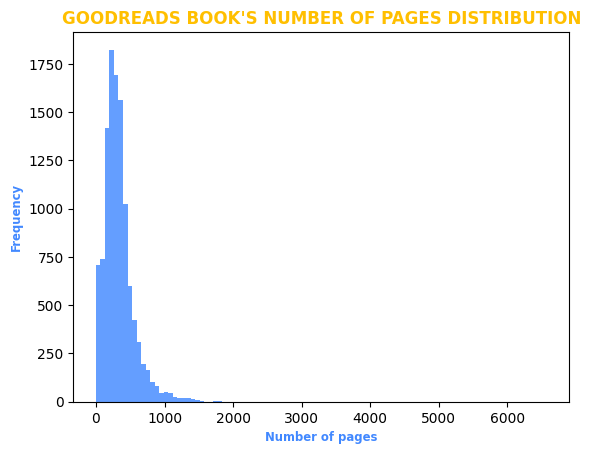

In [ ]:
#Create histogram
plt.hist(book_data['  num_pages'], bins=100, color = "#649eff")

#Set title, label
plt.title("GOODREADS BOOK'S NUMBER OF PAGES DISTRIBUTION", color = '#ffbf00', fontsize = "12", fontweight = "bold")
plt.xlabel("Number of pages", color = "#4188ff", fontsize = "small", fontweight = "demibold")
plt.ylabel("Frequency", color = "#4188ff", fontsize = "small", fontweight = "demibold")

plt.savefig('/content/Graph/plot4_1.png', dpi=300)

<Figure size 1000x1000 with 0 Axes>

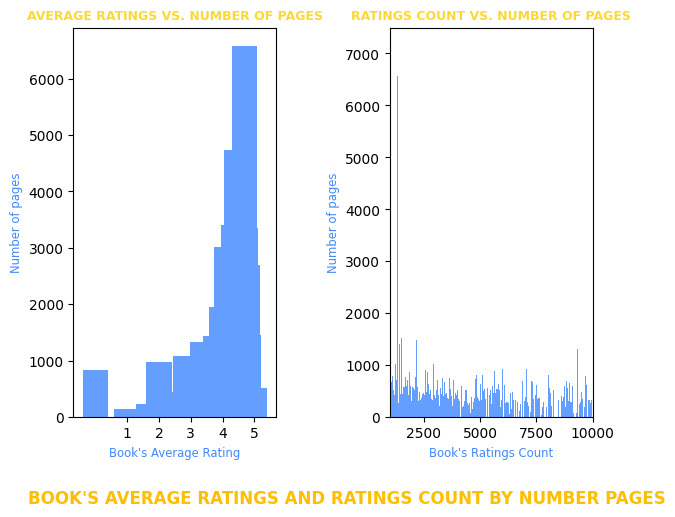

In [ ]:
plt.figure(figsize = (10,10))
fig, (ax1,ax2) = plt.subplots(1,2)

#AVG RATINGS VS. NUM PAGES
ax1.bar(book_data['average_rating'],book_data['  num_pages'], color = "#649eff") #create bar chart

#set title, label
ax1.set_title("AVERAGE RATINGS VS. NUMBER OF PAGES", color = '#fdd835', fontsize = "9", fontweight = "bold")
ax1.set_xticks(ticks = [1,2,3,4,5])
ax1.set_xlabel("Book's Average Rating", color = "#4188ff", fontsize = "small", fontweight = "book")
ax1.set_ylabel("Number of pages", color = "#4188ff", fontsize = "small", fontweight = "book")

#RATINGS COUNT VS. NUM PAGES
ax2.set_ylim(bottom = 0, top = 7500)
ax2.set_xlim(1000,10000)
ax2.bar(book_data['ratings_count'], book_data['  num_pages'], width = 10, color = "#649eff") #create bar chart

#set title, label
ax2.set_title("RATINGS COUNT VS. NUMBER OF PAGES", color = '#fdd835', fontsize = "9", fontweight = "bold")
ax2.set_xlabel("Book's Ratings Count", color = "#4188ff", fontsize = "small", fontweight = "book")
ax2.set_ylabel("Number of pages", color = "#4188ff", fontsize = "small", fontweight = "book")

fig.tight_layout()

#Set subplot's title
fig.suptitle("BOOK'S AVERAGE RATINGS AND RATINGS COUNT BY NUMBER PAGES", x = 0.55, y = -0.06, va = 'baseline', color = '#ffbf00', fontweight = "semibold")
plt.savefig('/content/Graph/plot4_2.png', dpi=300)

#5.Language

In [ ]:
#Count percentages of each language code
languages = pd.DataFrame(book_data.language_code.value_counts())
languages /= 11123

#Add "other" series to dataframe
other = pd.DataFrame({'language_code': [0]},index = ['other'])
languages = languages.append(other)

In [ ]:
#Add all language codes have value < 0.015 to "other"
for language in languages.index:
  value = languages.language_code[language]
  other = languages.language_code['other']
  if value < 0.015:
    languages.replace(other,other+value,inplace=True)
    languages.drop(language, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


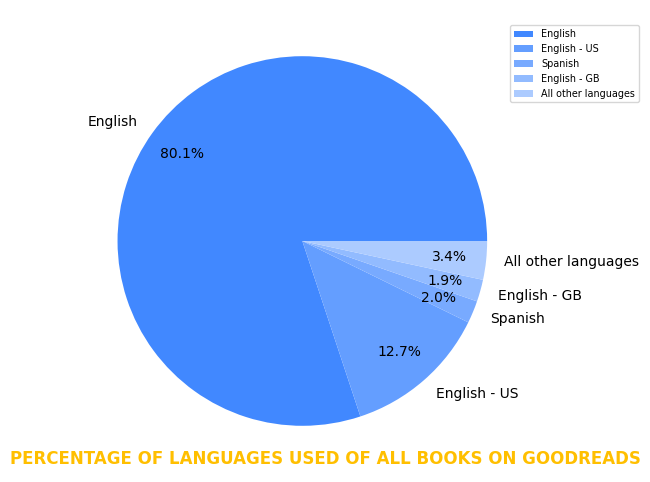

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize = (10,6))

#Create pie chart
plt.pie(languages, labels = ['English','English - US','Spanish','English - GB', 'All other languages'], colors = blue[::-1], autopct = '%1.1f%%', pctdistance = 0.8)

#Set title, label
plt.title("PERCENTAGE OF LANGUAGES USED OF ALL BOOKS ON GOODREADS", x=0.55,y=0, color = '#ffbf00', fontsize = "large", fontweight = "bold")
plt.legend(loc=(0.95,0.8), fontsize = 'x-small')
plt.show()

plt.savefig('/content/Graph/plot5.png', dpi=300)

In [ ]:
language_df = pd.DataFrame(book_data.language_code.value_counts()) #Create new language dataframe from count value

In [ ]:
#Create 2 new dictionaries
language_avg_dict = {}
language_count_dict = {}
index = 0

#create new dictionary of sum(average rating), sum(ratings count) for each language
for language in book_data['language_code']:
  if language not in language_avg_dict:
    language_avg_dict[language] = book_data.average_rating[index]
  else:
    language_avg_dict[language] += book_data.average_rating[index]

  if language not in language_count_dict:
    language_count_dict[language] = book_data.ratings_count[index]
  else:
    language_count_dict[language] += book_data.ratings_count[index]

  index+=1

#Count average rating for each language
for language1 in language_avg_dict.keys():
  for language2 in language_df.index:
    if language1 == language2:
      language_avg_dict[language1] /= language_df.language_code[language2]

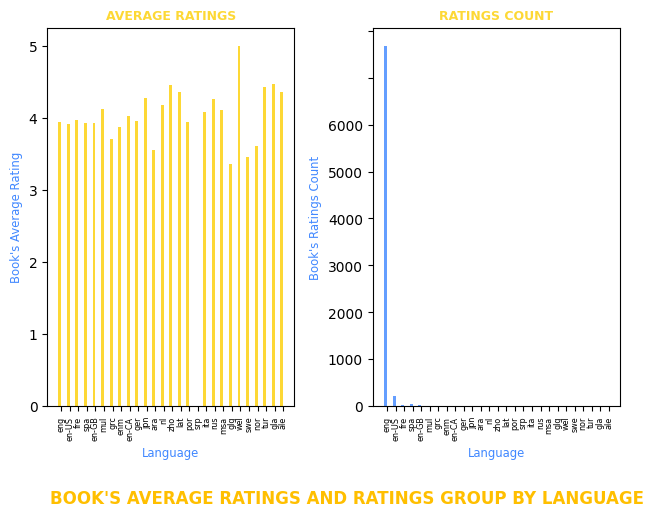

In [ ]:
labels = language_avg_dict.keys()
avg_rating = language_avg_dict.values()
ratings_count = language_count_dict.values()

x = np.arange(len(labels))  #the label locations
width = 0.35  #the width of the bars

fig, (ax1,ax2) = plt.subplots(1,2)

#AVG RATINGS VS. NUM PAGES
ax1.bar(x - width/2, avg_rating, width, label='Ratings count', color = '#fdd835')

#Set title, label
ax1.set_title("AVERAGE RATINGS", color = '#fdd835', fontsize = "9", fontweight = "bold")
ax1.set_ylabel("Book's Average Rating", color = "#4188ff", fontsize = "small", fontweight = "book")
ax1.set_xlabel("Language", color = "#4188ff", fontsize = "small", fontweight = "book")
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation = 90, fontsize = "xx-small")

#RATINGS COUNT VS. NUM PAGES
ax2.bar(x - width/2, ratings_count, width, label='Average rating', color = "#649eff")

#Set title, label
ax2.set_title("RATINGS COUNT", color = '#fdd835', fontsize = "9", fontweight = "bold")
ax2.set_ylabel("Book's Ratings Count", color = "#4188ff", fontsize = "small", fontweight = "book")
ax2.set_xlabel("Language", color = "#4188ff", fontsize = "small", fontweight = "book")
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation = 90, fontsize = "xx-small")
ax2.set_yticklabels(range(0,7000,1000))

fig.tight_layout()
fig.suptitle("BOOK'S AVERAGE RATINGS AND RATINGS GROUP BY LANGUAGE", x = 0.55, y = -0.06, va = 'baseline', color = '#ffbf00', fontweight = "semibold")
plt.savefig('/content/Graph/plot6.png', dpi=300)